In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./dataset/FAOSTAT_data_en_11-1-2024.csv')

In [6]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1961,1961,°c,0.745,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1962,1962,°c,0.015,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1963,1963,°c,2.706,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1964,1964,°c,-5.250,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1965,1965,°c,1.854,E,Estimated value


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241893 entries, 0 to 241892
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       241893 non-null  object 
 1   Domain            241893 non-null  object 
 2   Area Code (M49)   241893 non-null  int64  
 3   Area              241893 non-null  object 
 4   Element Code      241893 non-null  int64  
 5   Element           241893 non-null  object 
 6   Months Code       241893 non-null  int64  
 7   Months            241893 non-null  object 
 8   Year Code         241893 non-null  int64  
 9   Year              241893 non-null  int64  
 10  Unit              241893 non-null  object 
 11  Value             231633 non-null  float64
 12  Flag              241893 non-null  object 
 13  Flag Description  241893 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 25.8+ MB


In [14]:
df['Unit'].unique()

array(['°c'], dtype=object)

**Value มีข้อมูลหายไป หาจำนวนข้อมูลที่หายไปและคิดเป็นเปอร์เซนต์**

In [17]:
df['Value'].isna().sum()

10260

In [19]:
missing_value = df['Value'].isna().sum()
total_value = len(df)
missing_percent = (missing_value / total_value) * 100
print(missing_percent)

4.241544815269561


In [21]:
df.fillna({'Value': 0}, inplace = True)

**เอา Flag กับ Flag Description และ Year Code ออก เพราะไม่ได้ส่งผลต่อข้อมูลมาก**

In [24]:
df['Flag Description'].unique()

array(['Estimated value', 'Missing value'], dtype=object)

In [26]:
df['Flag'].unique()

array(['E', 'O'], dtype=object)

In [28]:
df.drop('Flag',axis=1, inplace = True)

In [30]:
df.drop('Flag Description',axis=1, inplace = True)

In [32]:
df.drop('Year Code',axis=1, inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241893 entries, 0 to 241892
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Domain Code      241893 non-null  object 
 1   Domain           241893 non-null  object 
 2   Area Code (M49)  241893 non-null  int64  
 3   Area             241893 non-null  object 
 4   Element Code     241893 non-null  int64  
 5   Element          241893 non-null  object 
 6   Months Code      241893 non-null  int64  
 7   Months           241893 non-null  object 
 8   Year             241893 non-null  int64  
 9   Unit             241893 non-null  object 
 10  Value            241893 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ MB


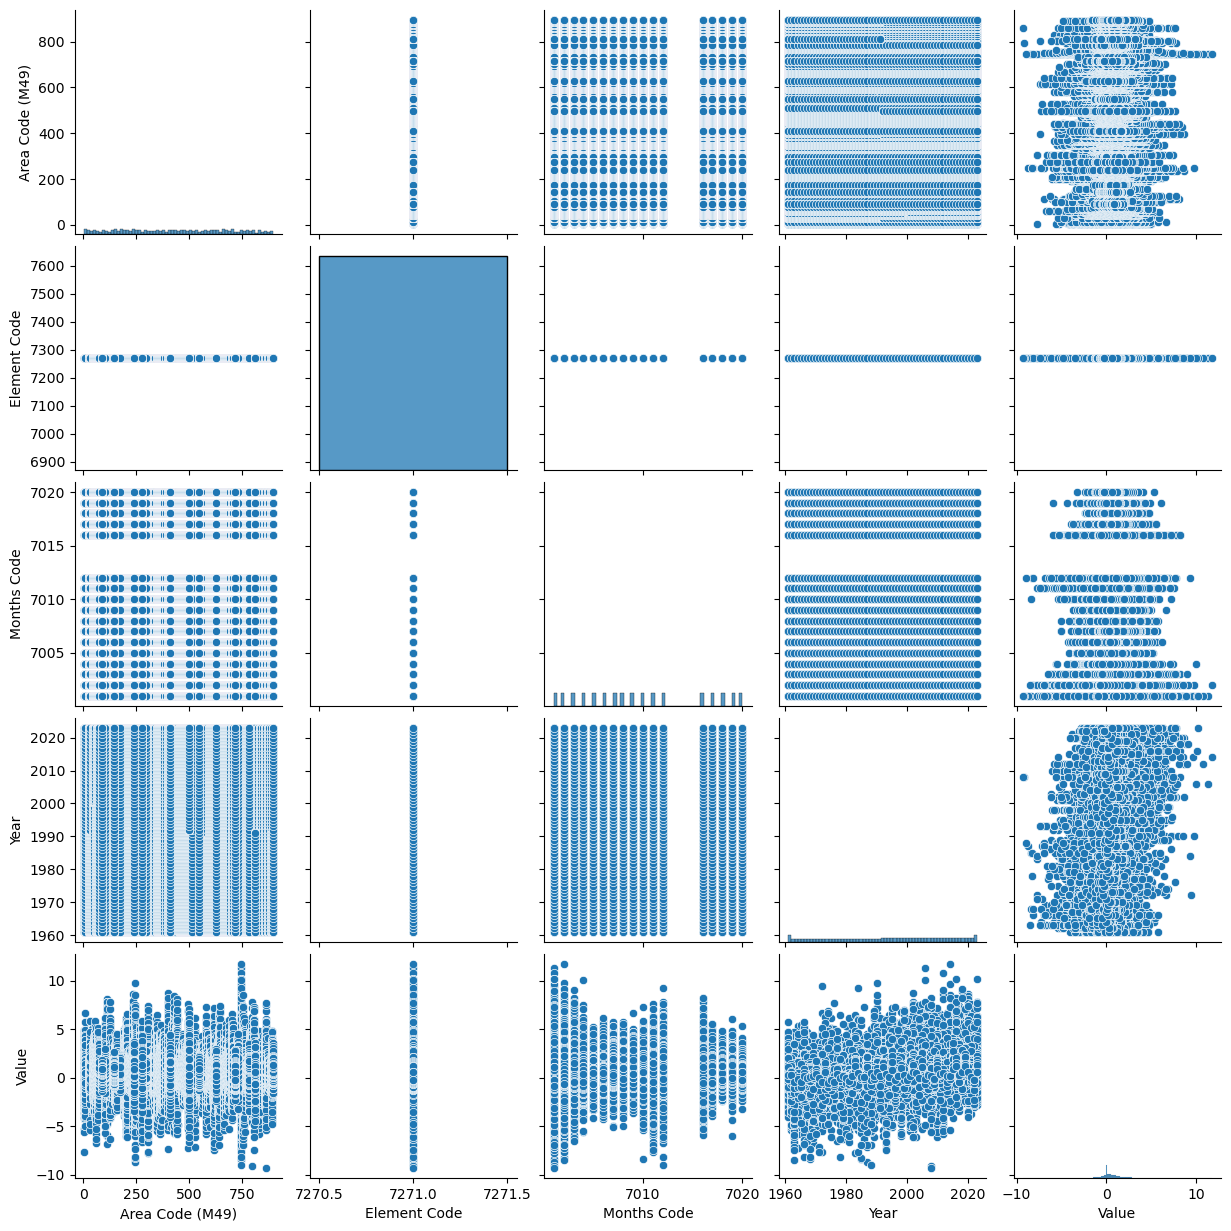

In [90]:
sns.pairplot(df)

**ข้อมูลใน Months มีแบบไตรมาสกับเฉลี่ยรายปีด้วย ต้องการเลือกเฉพาะ 12 เดือน เพื่อความแม่นยำ**

In [36]:
df['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

In [38]:
df_months = df[df['Months'].isin([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])]

**Visualization**

กราฟแสดงประเทศที่มีการเปลี่ยนแปลงอุณหภูมิรายปีมากที่สุด

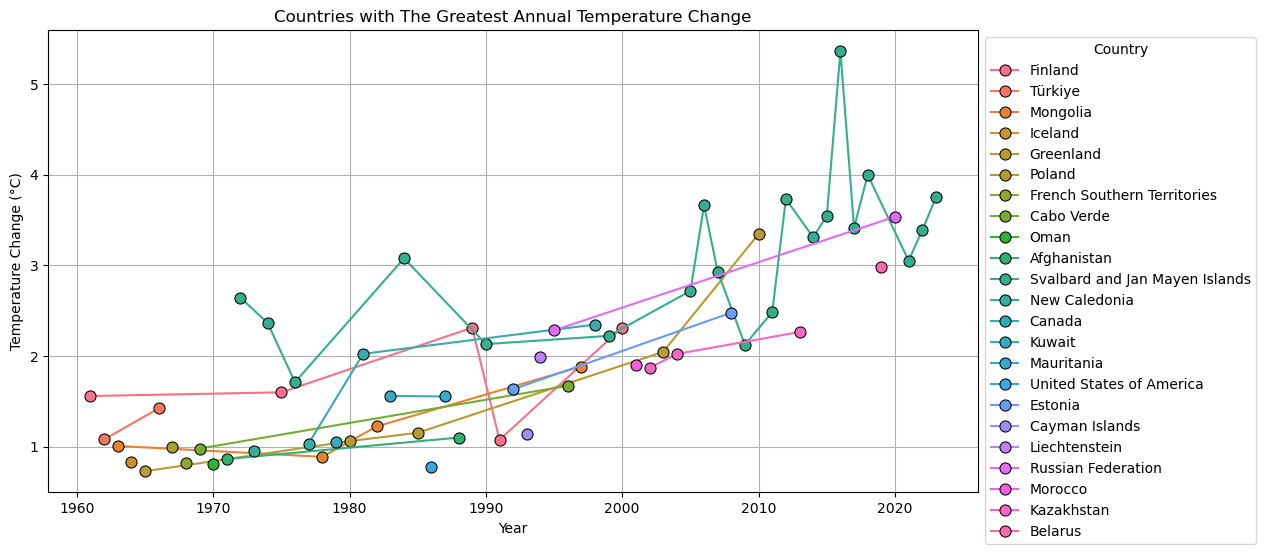

In [53]:
annual_temp_country = df_months.groupby(['Year', 'Area'])['Value'].mean().reset_index()
max_temp_change = annual_temp_country.loc[annual_temp_country.groupby('Year')['Value'].idxmax()]

plt.figure(figsize=(12,6))
sns.lineplot(data=max_temp_change, x='Year', y='Value', hue='Area', marker='o', mec='black',ms=8)
plt.title('Countries with The Greatest Annual Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend(title='Country',bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

แสดงการจัดอันดับ 10 ประเทศที่อุณหภูมิเพิ่มขึ้นมากที่สุดและ 10 ประเทศที่อุณหภูมิลดลงมากที่สุด

C:\Users\Admin\AppData\Local\Temp\ipykernel_832\2141148573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_countries, x="Value", y="Area", ax=axes[0], palette="Reds", edgecolor='k', alpha=1,hatch = '/')
C:\Users\Admin\AppData\Local\Temp\ipykernel_832\2141148573.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_countries, x="Value", y="Area", ax=axes[1], palette="Blues", edgecolor='k', alpha=1,hatch = '/')


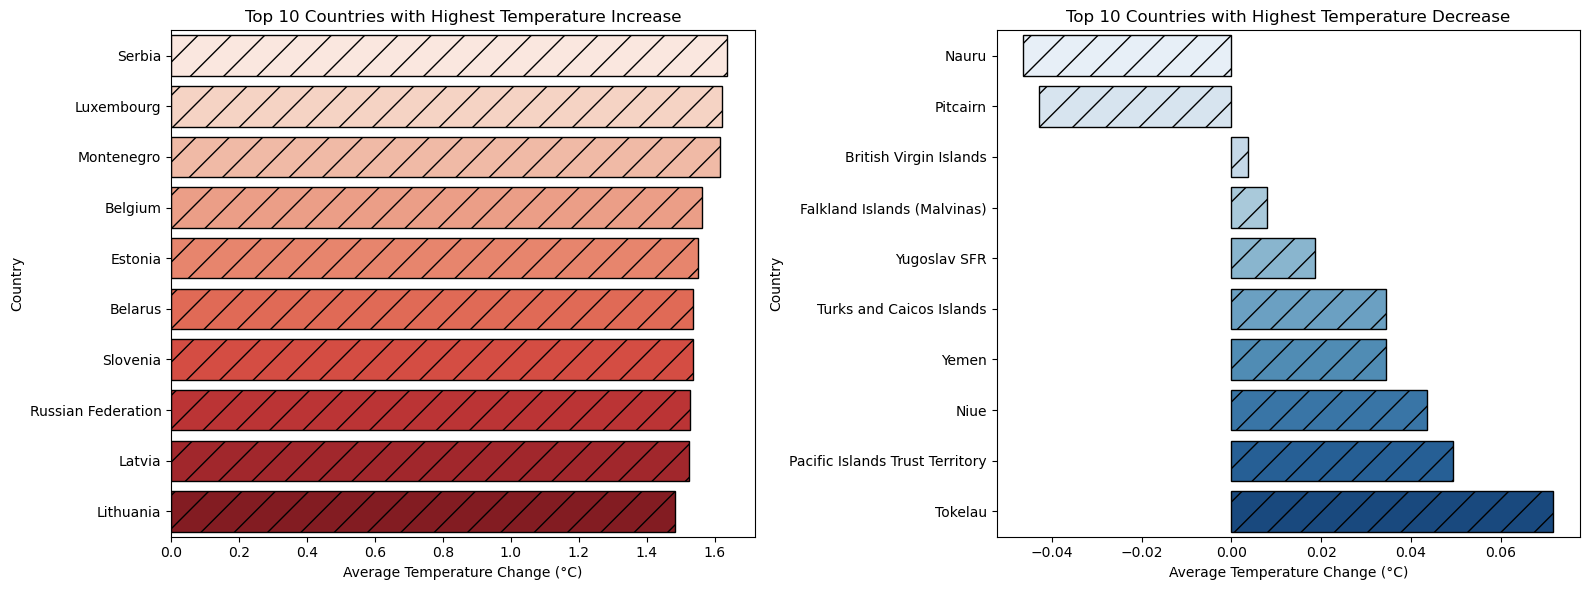

In [59]:
#คำนวณค่าเฉลี่ยอุณหภูมิเปลี่ยนแปลงต่อประเทศ
temp_change_country = df_months.groupby("Area")["Value"].mean().reset_index()

highest_countries = temp_change_country .nlargest(10, "Value")
lowest_countries = temp_change_country .nsmallest(10, "Value")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=highest_countries, x="Value", y="Area", ax=axes[0], palette="Reds", edgecolor='k', alpha=1,hatch = '/')
axes[0].set_title("Top 10 Countries with Highest Temperature Increase")
axes[0].set_xlabel("Average Temperature Change (°C)")
axes[0].set_ylabel("Country")

sns.barplot(data=lowest_countries, x="Value", y="Area", ax=axes[1], palette="Blues", edgecolor='k', alpha=1,hatch = '/')
axes[1].set_title("Top 10 Countries with Highest Temperature Decrease")
axes[1].set_xlabel("Average Temperature Change (°C)")
axes[1].set_ylabel("Country")

plt.tight_layout()
plt.show()

แสดงสัดส่วนระหว่างปีที่มีอุณหภูมิเพิ่มขึ้นกับปีที่มีอุณหภูมิลดลง

In [62]:
avg_annual_temp = df.groupby('Year')['Value'].mean().dropna()

#นับจำนวนปีที่อุณหภูมิเพิ่มขึ้นและลดลง
hot_years = (avg_annual_temp.diff() > 0).sum()
cold_years = (avg_annual_temp.diff() < 0).sum()

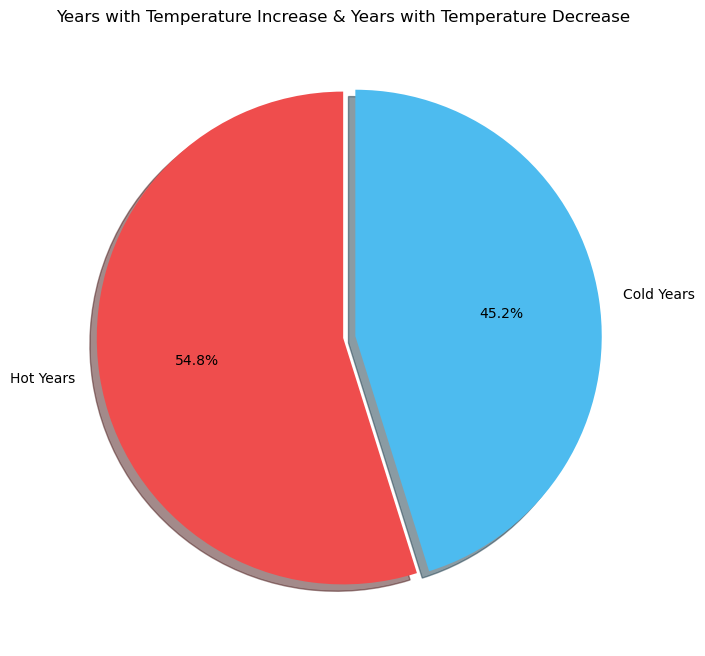

In [70]:
plt.figure(figsize=(8, 8))
plt.pie([hot_years, cold_years], labels=['Hot Years', 'Cold Years'],explode = [0,0.05],
        autopct='%1.1f%%', colors=['#ef4d4d', '#4dbbef'], startangle=90,shadow = True)
plt.title('Years with Temperature Increase & Years with Temperature Decrease')
plt.show()

แสดงสัดส่วนอันดับ 10 ปีที่อุณหภูมิเพิ่มขึ้นมากที่สุด

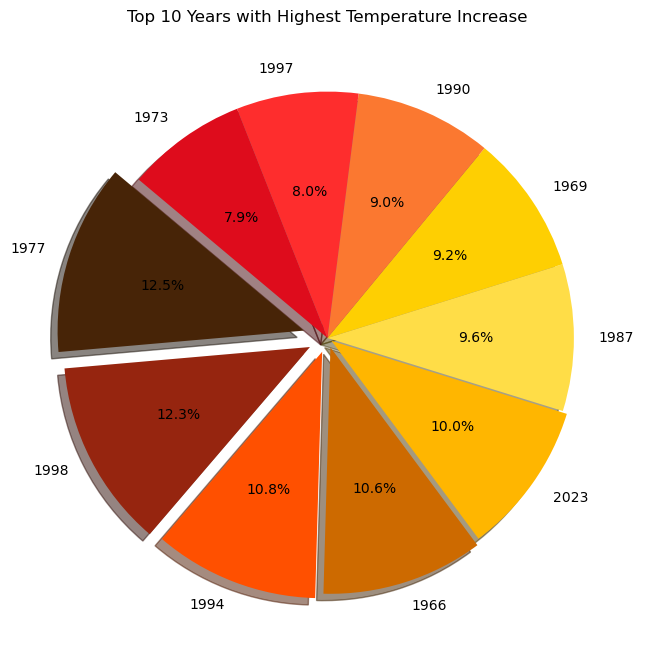

In [73]:
temp_change = avg_annual_temp.diff() #คำนวณการเปลี่ยนแปลงของอุณหภูมิระหว่างปี
top_10_hot_years = temp_change.nlargest(10) #เลือกมา 10 ปีที่อุณหภูมิเพิ่มขึ้นมากที่สุด

plt.figure(figsize=(8, 8))
plt.pie(top_10_hot_years, labels=top_10_hot_years.index, autopct='%1.1f%%',explode = [0.1,0.08,0.06,0.04,0.02,0,0,0,0,0],
        colors= ['#472407','#96250f','#ff5000','#cd6a00','#ffb600', '#ffdd47','#fecf02','#fb7830','#fe2d2d','#de0c1c'],
        startangle=140, shadow=True)

plt.title('Top 10 Years with Highest Temperature Increase')
plt.show()

แสดงสัดส่วนอันดับ 10 ปีที่อุณหภูมิลดลงมากที่สุด

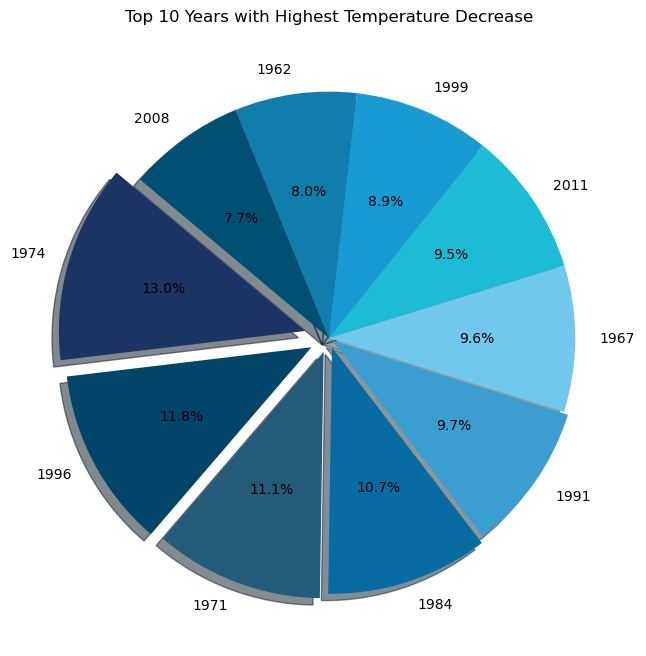

In [77]:
top_10_cold_years = temp_change.nsmallest(10)

plt.figure(figsize=(8, 8))
plt.pie(abs(top_10_cold_years), labels=top_10_cold_years.index, autopct='%1.1f%%',explode = [0.1,0.08,0.06,0.04,0.02,0,0,0,0,0],
        colors= ['#1c3464','#034569','#235b79','#086ca2','#3c9dd0', '#71c7ec','#1ebbd7','#189ad3','#107dac','#005073'],
        startangle=140, shadow=True)

plt.title('Top 10 Years with Highest Temperature Decrease')
plt.show()

แสดงค่าอุณหภูมิที่เปลี่ยนแปลงในช่วงแต่ละทศวรรษที่ผ่านมา

C:\Users\Admin\AppData\Local\Temp\ipykernel_16972\3315738025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_months["Decade"] = (df_months["Year"] // 10) * 10
C:\Users\Admin\AppData\Local\Temp\ipykernel_16972\3315738025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_months, x="Decade", y="Value", palette="coolwarm")


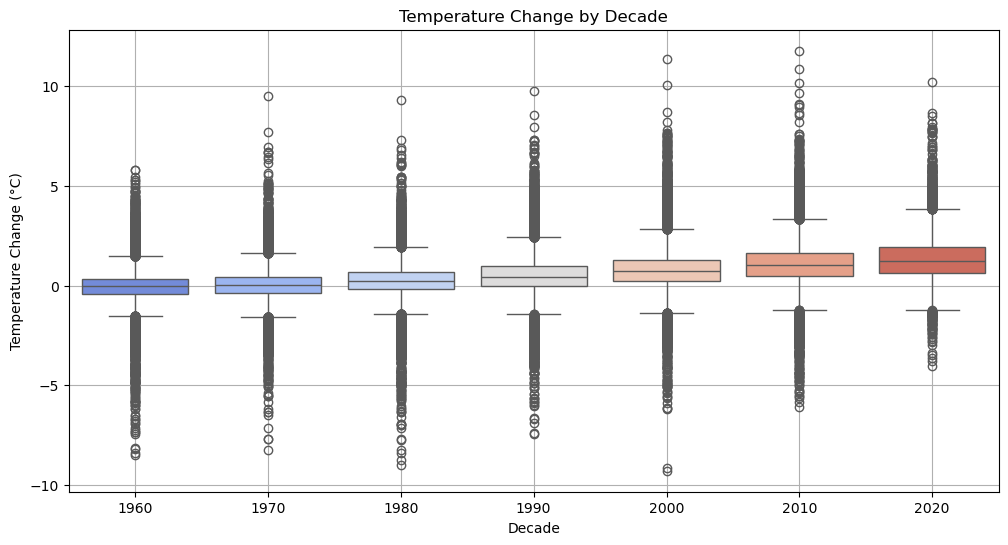

In [50]:
df_months["Decade"] = (df_months["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_months, x="Decade", y="Value", palette="coolwarm")
plt.title("Temperature Change by Decade")
plt.xlabel("Decade")
plt.ylabel("Temperature Change (°C)")
plt.grid(True)
plt.show()

**Data Mining แบบ Descriptive**

ในกรณีนี้จะใช้ Data Mining แบบ Descriptive คือ Cluster Analysis จัดกลุ่มปีที่มีอุณหภูมิใกล้เคียงกันเพื่อดูความสัมพันธ์และโครงสร้างข้อมูล โดยไม่สนใจการพยากรณ์

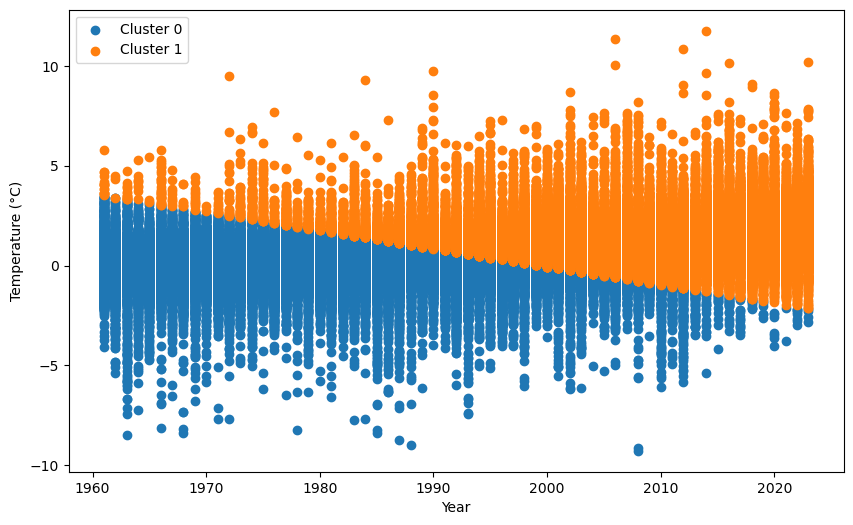

In [142]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = df_months[['Year', 'Value']].dropna() #ทำโมเดลข้อมูลโดยอ้างอิงจากข้อมูลปี(Year)และค่าอุณภูมิ(Value)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

k = 2  #แบ่งจำนวนกลุ่มเป็น 2 กลุ่ม คือ อุณหภูมิร้อนและเย็น โดยสีส้มคืออุณหภูมิร้อนและสีฟ้าคืออุณหภูมิเย็น
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(data_scaled)
data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
for cluster in range(k):
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(clustered_data['Year'], clustered_data['Value'], label=f'Cluster {cluster}')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


**Data Mining แบบ Predictive**

ในกรณีนี้จะใช้ Data Mining แบบ Predictive คือ Linear Regression เพื่อสร้างสมการเส้นตรงที่ทำนายค่าตัวแปรตามโดยในข้อมูลนี้จะเป็นอุณหภูมิในการทำนายอุณหภูมิในปีต่อๆ ไป โดยมีการทำนาย 10 ประเทศที่จะมีอุณภูมิเปลี่ยนแปลงขึ้นสูงที่สุดโดยอ้างอิงจากความลาดชันของกราฟเส้น


Top 10 contries with the most temperature change:
1. Svalbard and Jan Mayen Islands - Slope: 0.0784
2. Ukraine - Slope: 0.0702
3. Republic of Moldova - Slope: 0.0679
4. Georgia - Slope: 0.0676
5. Armenia - Slope: 0.0659
6. Azerbaijan - Slope: 0.0639
7. Serbia - Slope: 0.0599
8. Belarus - Slope: 0.0591
9. Montenegro - Slope: 0.0591
10. Russian Federation - Slope: 0.0585


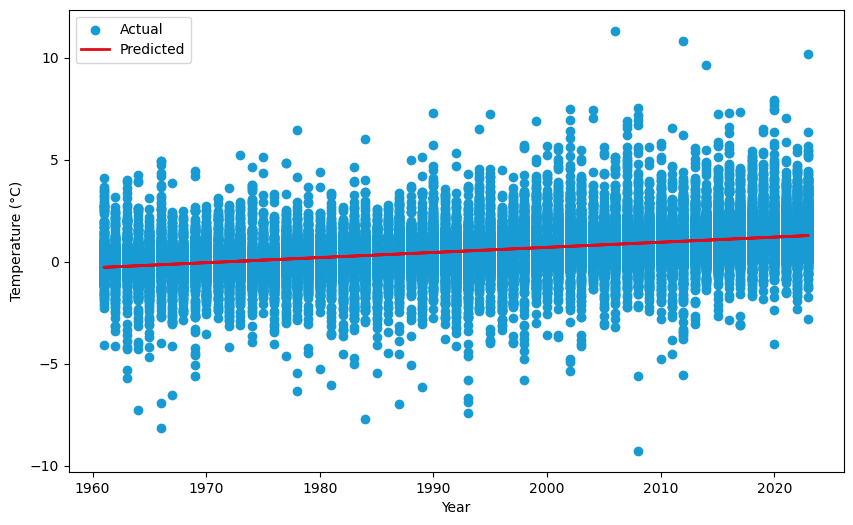

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = df_months[['Area', 'Year', 'Value']].dropna()
contries_slopes = []

for contries in data['Area'].unique():
    contries_data = data[data['Area'] == contries]
    X = contries_data[['Year']]
    y = contries_data['Value']
    
    model = LinearRegression()
    model.fit(X, y)
    
    slope = model.coef_[0]
    contries_slopes.append((contries, slope))

#เลือก 10 ประเทศที่มีการเปลี่ยนแปลงอุณหภูมิสูงสุด (ใช้ค่าความชันเพื่อทำนายอุณหภูมิในปีต่อๆ ไป)
top_10_contries = sorted(contries_slopes, key=lambda x: abs(x[1]), reverse=True)[:10]
print("\nTop 10 contries with the most temperature change:")
for rank, (contries, slope) in enumerate(top_10_contries, 1):
    print(f"{rank}. {contries} - Slope: {slope:.4f}")

X_data = data[['Year']]
y_data = data['Value']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='#189ad3', label='Actual') #ข้อมูลแสดงข้อมูลจริงในชุดข้อมูล
plt.plot(X_test, y_pred, color='#de0c1c', linewidth=2, label='Predicted') #ข้อมูลแสดงค่าที่ทำนายออกมา
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

สร้างข้อมูลปีที่อนาคต โดยมีการกำหนดถึงปี 2030 และทำนายข้อมูลอุณหภูมิโดยอ้างอิงจากชุดข้อมูลที่มีอยู่

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted temperature for 2025: 1.33°C
Predicted temperature for 2026: 1.35°C
Predicted temperature for 2027: 1.38°C
Predicted temperature for 2028: 1.40°C
Predicted temperature for 2029: 1.43°C
Predicted temperature for 2030: 1.45°C


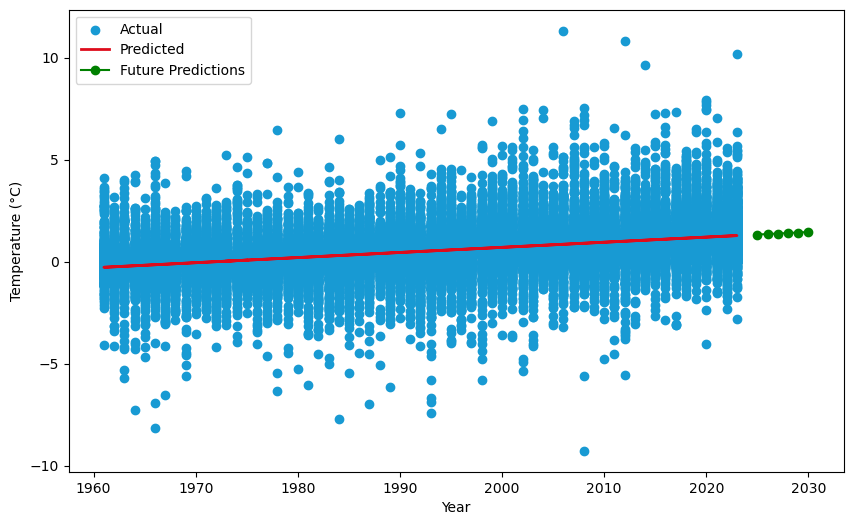

In [156]:
years_in_future = np.array([2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)  #สร้างข้อมูลปีในอนาคตจนถึงปี 2030 เพื่อใช้ในการทำนายอุณหภูมิ

future_predictions = model.predict(years_in_future)
for year, prediction in zip(years_in_future.flatten(), future_predictions):
    print(f"Predicted temperature for {year}: {prediction:.2f}°C") #แสดงข้อมูลอุณหภูมิที่ทำนายได้

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='#189ad3', label='Actual')  #ข้อมูลจริงในชุดข้อมูล
plt.plot(X_test, y_pred, color='#de0c1c', linewidth=2, label='Predicted')  #ข้อมูลที่ทำนายจากข้อมูลที่มี
plt.plot(years_in_future, future_predictions, color='green', marker='o', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
